In [2]:
import pandas as pd
import matplotlib.pyplot as plt

adult_df = pd.read_csv('adult.csv')

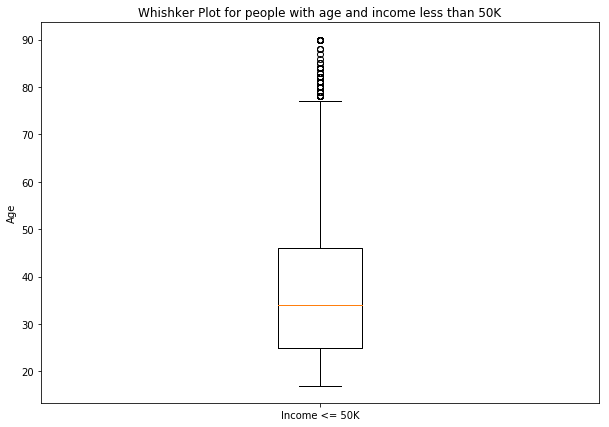

In [124]:
income_df = adult_df[adult_df.income.str.contains("<=50K")]['age']
age_list = income_df.tolist()
plt.figure(figsize=(10,7))
plt.boxplot(age_list, labels=['Income <= 50K'])
plt.ylabel('Age')
plt.title('Whishker Plot for people with age and income less than 50K')
plt.show()

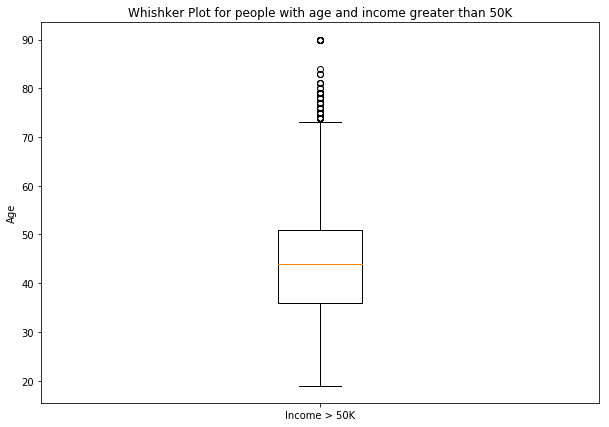

In [125]:
gt_income_df = adult_df[adult_df.income.str.contains(">50K")]['age']
gt_age_list = gt_income_df.tolist()
plt.figure(figsize=(10,7))
plt.boxplot(gt_age_list, labels=['Income > 50K'])
plt.ylabel('Age')
plt.title('Whishker Plot for people with age and income greater than 50K')
plt.show()

{' 9th', ' Doctorate', ' 5th-6th', ' 12th', ' Masters', ' 7th-8th', ' 10th', ' Preschool', ' Assoc-acdm', ' Prof-school', ' 11th', ' Bachelors', ' Assoc-voc', ' Some-college', ' HS-grad', ' 1st-4th'}


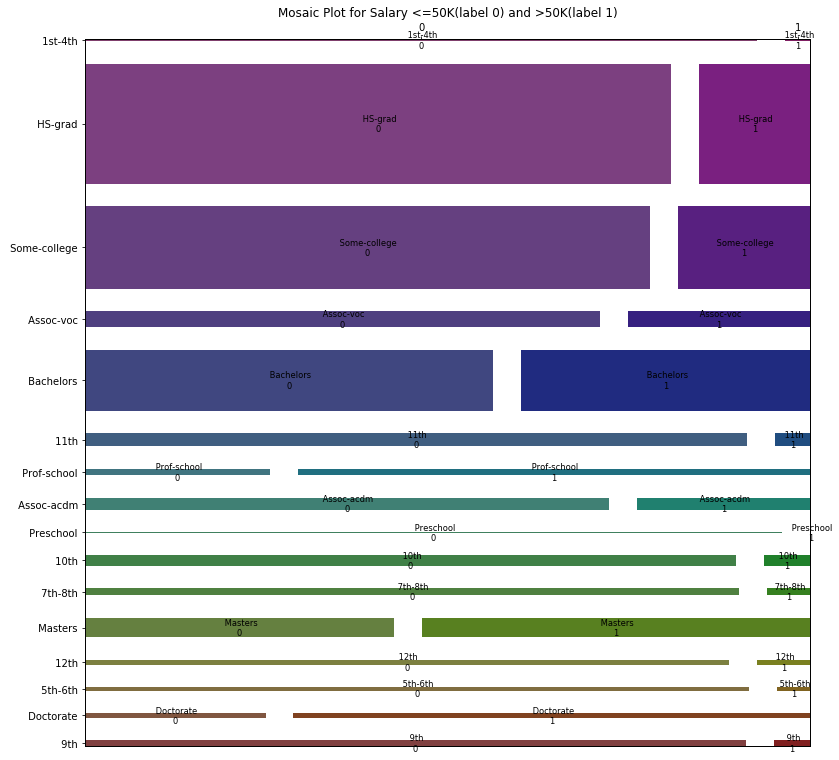

In [139]:
import statsmodels.graphics.mosaicplot as mosaicplot

data = {}
filtered_df = adult_df[['education', 'income']]
education_set = set(adult_df['education'].tolist())
print(education_set)
for row in education_set:
    temp_df = filtered_df[filtered_df.education.str.contains(row)]
    data[(row, 0)] = temp_df[temp_df.income.str.contains("<=50K")].shape[0];
    data[(row, 1)] = temp_df[temp_df.income.str.contains(">50K")].shape[0];
with plt.rc_context():
    plt.rc("figure", figsize=(13,13))
    mosaicplot.mosaic(data, gap=0.06, title='Mosaic Plot for Salary <=50K(label 0) and >50K(label 1)', statistic = False, horizontal = False)
plt.show()

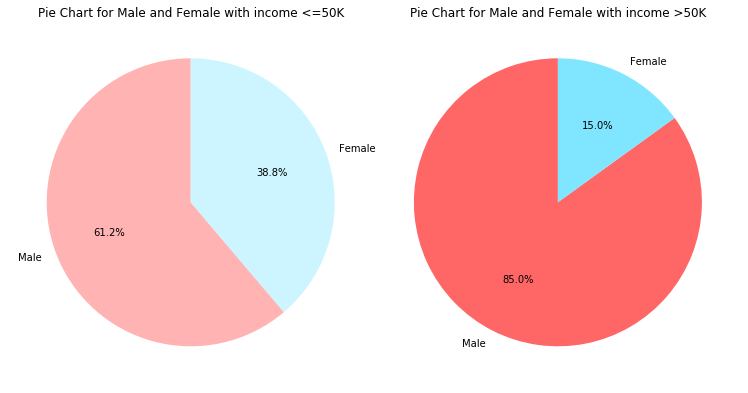

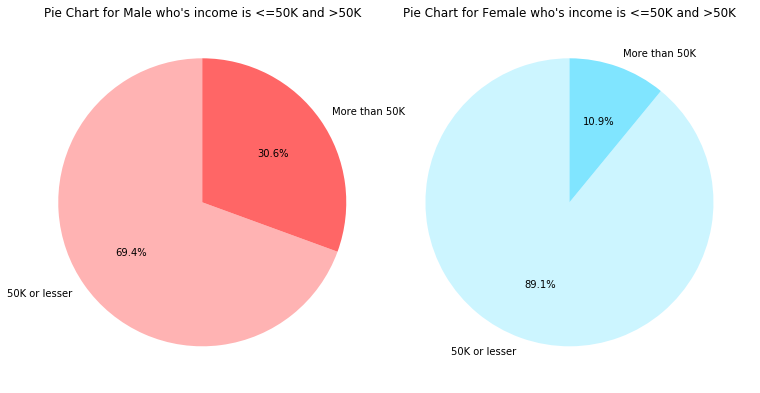

In [75]:
import numpy as np

less_income_sex = adult_df[adult_df.income.str.contains("<=50K")]['sex']
high_income_sex = adult_df[adult_df.income.str.contains(">50K")]['sex']
less_income_list = less_income_sex.tolist()
high_income_list = high_income_sex.tolist()

male_less_income = less_income_list.count(' Male')
female_less_income = less_income_list.count(' Female')
male_high_income = high_income_list.count(' Male')
female_high_income = high_income_list.count(' Female')
total_male = male_less_income + male_high_income
total_female = female_less_income + female_high_income

female_high_income_color = '#80e5ff'
female_less_income_color = '#ccf5ff'
male_high_income_color = '#ff6666'
male_less_income_color = '#ffb3b3'

fig = plt.figure(figsize = (17, 10))
labels = 'Male', 'Female'

less_income_data = [male_less_income, female_less_income]
ax1 = fig.add_axes([0, 0, .5, .5], aspect = 1)
ax1.pie(less_income_data, colors = [male_less_income_color, female_less_income_color], labels = labels, autopct = '%1.1f%%', startangle = 90)

high_income_data = [male_high_income, female_high_income]
ax2 = fig.add_axes([0.3, .0, .5, .5], aspect = 1)
ax2.pie(high_income_data, colors = [male_high_income_color, female_high_income_color], labels = labels, autopct = '%1.1f%%', startangle = 90)

ax1.set_title('Pie Chart for Male and Female with income <=50K')
ax2.set_title('Pie Chart for Male and Female with income >50K')
plt.show()

fig2 = plt.figure(figsize = (17, 10))
labels2 = '50K or lesser', 'More than 50K'

male_data = [male_less_income, male_high_income]
ax1 = fig2.add_axes([0, 0, .5, .5], aspect = 1)
ax1.pie(male_data, colors = [male_less_income_color, male_high_income_color], labels = labels2, autopct = '%1.1f%%', startangle = 90)

female_data = [female_less_income, female_high_income]
ax2 = fig2.add_axes([0.3, .0, .5, .5], aspect = 1)
ax2.pie(female_data, colors = [female_less_income_color, female_high_income_color], labels = labels2, autopct = '%1.1f%%', startangle = 90)

ax1.set_title('Pie Chart for Male who\'s income is <=50K and >50K')
ax2.set_title('Pie Chart for Female who\'s income is <=50K and >50K')

plt.show()

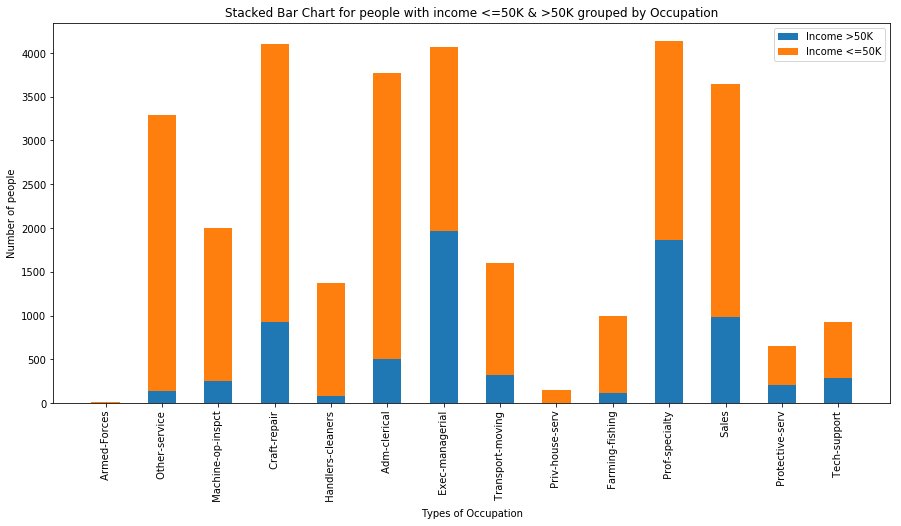

In [120]:
occupation = adult_df['occupation']
occupation_list = occupation.tolist()
occupation_set = set(occupation_list);
occupation_set.remove(' ?')

less_income_occupation = adult_df[adult_df.income.str.contains("<=50K")]['occupation']
high_income_occupation = adult_df[adult_df.income.str.contains(">50K")]['occupation']
less_income_occupation_list = less_income_occupation.tolist()
high_income_occupation_list = high_income_occupation.tolist()

less_income_list = []
high_income_list = []
for occupation in occupation_set:
    less_income_count = less_income_occupation_list.count(occupation)
    less_income_list.append(less_income_count)
    high_income_count = high_income_occupation_list.count(occupation)
    high_income_list.append(high_income_count)

N = len(occupation_set)
index = np.arange(N)
width = 0.5
plt.figure(figsize=(15,7))
p1 = plt.bar(index, high_income_list, width)
p2 = plt.bar(index, less_income_list, width, bottom = high_income_list)
plt.ylabel('Number of people')
plt.xlabel('Types of Occupation')
plt.title('Stacked Bar Chart for people with income <=50K & >50K grouped by Occupation')
plt.xticks(index, occupation_set)
plt.xticks(rotation=90)
plt.legend((p1[0], p2[0]), ('Income >50K', 'Income <=50K'))
plt.show()